In [1]:
import pandas as pd   
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [2]:
gdp_df=pd.read_csv('../data/gdp_percapita.csv')

4)Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

How many rows and columns are in `gdp_df`? What are the data types of each column?

In [3]:
gdp_df.head()

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2021,1517.016266,NaN
1,Afghanistan,2020,1968.341002,NaN
2,Afghanistan,2019,2079.921861,NaN
3,Afghanistan,2018,2060.698973,NaN
4,Afghanistan,2017,2096.093111,NaN


In [4]:
gdp_df.tail()

,Country or Area,Year,Value,Value Footnotes
7657,Zimbabwe,1994,2670.106615,NaN
7658,Zimbabwe,1993,2458.783255,NaN
7659,Zimbabwe,1992,2468.278257,NaN
7660,Zimbabwe,1991,2781.787843,NaN
7661,Zimbabwe,1990,2704.757299,NaN


5)How many rows and columns are in `gdp_df`? What are the data types of each column?


In [5]:
gdp_df.shape

(7662, 4)

In [6]:
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7662 entries, 0 to 7661
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7662 non-null   object 
 1   Year             7662 non-null   int64  
 2   Value            7662 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 239.6+ KB


6)Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'

In [7]:
gdp_df= gdp_df.drop(columns = ['Value Footnotes'])


,Country or Area,Year,Value
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861


In [24]:
gdp_df.head()

,country,year,gdp_per_capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002
2,Afghanistan,2019,2079.921861
3,Afghanistan,2018,2060.698973
4,Afghanistan,2017,2096.093111


In [8]:
gdp_df=gdp_df.rename(columns={'Country or Area':'country','Year':'year','Value':'gdp_per_capita'})
gdp_df.head(2)

,country,year,gdp_per_capita
0,Afghanistan,2021,1517.016266
1,Afghanistan,2020,1968.341002


7)How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [28]:
gdp_df["year"].unique()

array([2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011,
       2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002, 2022, 2001,
       2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991, 1990])

In [10]:
year_value_count= gdp_df["country"].value_counts().reset_index()
year_value_count.head()


,country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33


In [11]:
incomplete_data_years=year_value_count[year_value_count["count"] != 33]
incomplete_data_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40 entries, 202 to 241
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  40 non-null     object
 1   count    40 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 960.0+ bytes


In [12]:
incomplete_data_years

,country,count
202,Hungary,32
203,Lebanon,32
204,Aruba,32
205,Tonga,32
206,Bhutan,32
207,Slovak Republic,31
208,Kuwait,31
209,Turkmenistan,31
210,Cambodia,30
211,West Bank and Gaza,29


In [13]:
gdp_df[gdp_df["country"]=="Somalia"]

,country,year,gdp_per_capita
6271,Somalia,2022,1155.275773
6272,Somalia,2021,1136.735989
6273,Somalia,2020,1127.418534
6274,Somalia,2019,1138.285937
6275,Somalia,2018,1098.492832
6276,Somalia,2017,1059.143932
6277,Somalia,2016,1076.198333
6278,Somalia,2015,1029.699218
6279,Somalia,2014,925.577067
6280,Somalia,2013,889.166677


In [14]:
gdp_df[gdp_df["country"]=="Djibouti"]

,country,year,gdp_per_capita
1694,Djibouti,2022,4991.016244
1695,Djibouti,2021,4912.671543
1696,Djibouti,2020,4753.887886
1697,Djibouti,2019,4768.113005
1698,Djibouti,2018,4589.378326
1699,Djibouti,2017,4451.683846
1700,Djibouti,2016,4291.297376
1701,Djibouti,2015,4073.622455
1702,Djibouti,2014,3854.269956
1703,Djibouti,2013,3664.268036


In [15]:
complete_data_years=year_value_count[year_value_count["count"] == 33]
complete_data_years.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 0 to 201
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   country  202 non-null    object
 1   count    202 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.7+ KB


In [16]:
complete_data_years.head()

,country,count
0,Least developed countries: UN classification,33
1,Middle East & North Africa,33
2,Middle East & North Africa (IDA & IBRD),33
3,Middle income,33
4,Mongolia,33


202 countries have complete data for all years and 40 countries have incomplete data for all years. Somalia and Djibouti started to have data recorded from 2013 upwards(both countries are neighbors; Somalia seemed to have had a change in governance around 2012/2013, which might have had something to do with data being collected) 

8)In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

In [17]:
year_2020=gdp_df.loc[gdp_df['year'].isin([2020])]
year_2020.head()

,country,year,gdp_per_capita
1,Afghanistan,2020,1968.341002
22,Africa Eastern and Southern,2020,3455.023119
55,Africa Western and Central,2020,3957.933804
88,Albania,2020,13278.369769
121,Algeria,2020,10844.770764


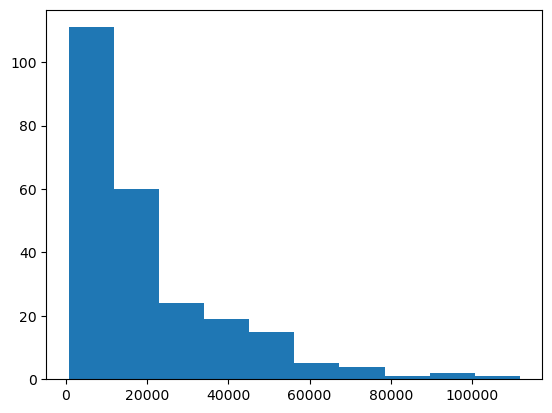

In [18]:
#histogram for 2020 looking at gdp per capita per country 
plt.hist(year_2020.gdp_per_capita)
plt.show()

/var/folders/z_/qdwpyw154zlbydznn1lhbp2m0000gn/T/ipykernel_77212/1379850799.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(year_2020['gdp_per_capita'], shade=True)


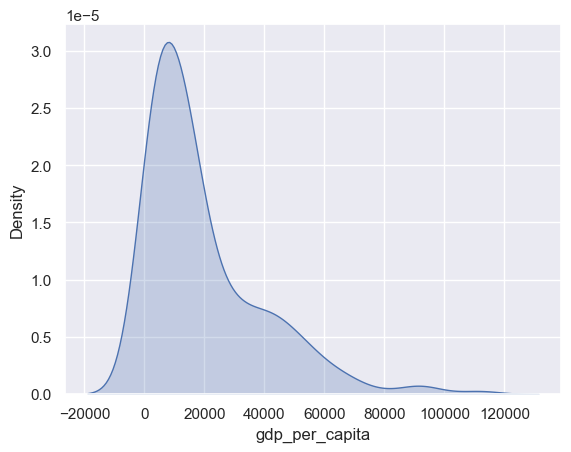

In [27]:
# density plot for 2020 looking at gdp per capita per country 
sns.set(style="darkgrid")
sns.kdeplot(year_2020['gdp_per_capita'], shade=True)
plt.show()

In [ ]:
#boxplot for 2020 looking at gdp per capita per country
